In [1]:
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [2]:
results = pd.read_parquet('results.parquet')
results.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
print(f"There are {results.shape[0]} rows and {results.shape[1]} columns in the dataset")

There are 65437 rows and 114 columns in the dataset


In [4]:
schema = pd.read_csv('results_schema.csv')
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


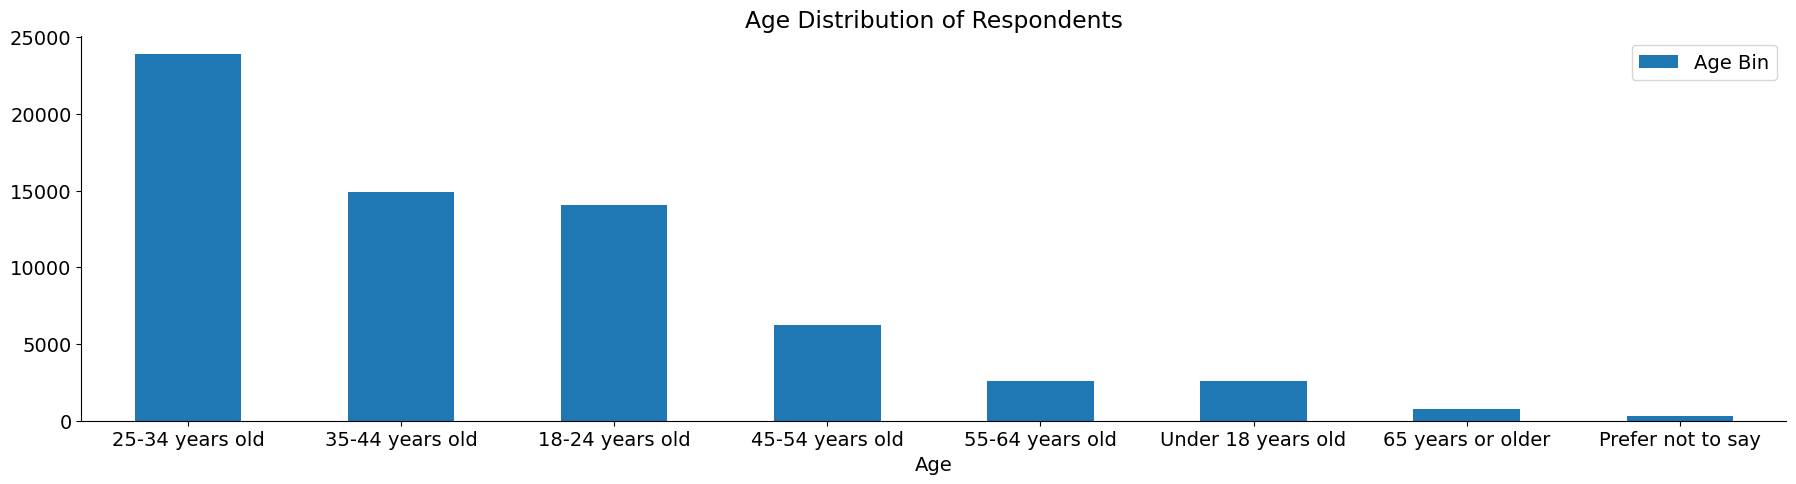

In [5]:
results['Age'].value_counts().plot(kind='bar', label='Age Bin')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [6]:
round(results['MainBranch'].value_counts()/len(results)*100,2).to_frame()\
                            .reset_index().rename(columns={'count':'Percentage'})

,MainBranch,Percentage
0,I am a developer by profession,76.73
1,"I am not primarily a developer, but I write co...",9.95
2,I am learning to code,5.92
3,I code primarily as a hobby,5.09
4,"I used to be a developer by profession, but no...",2.31


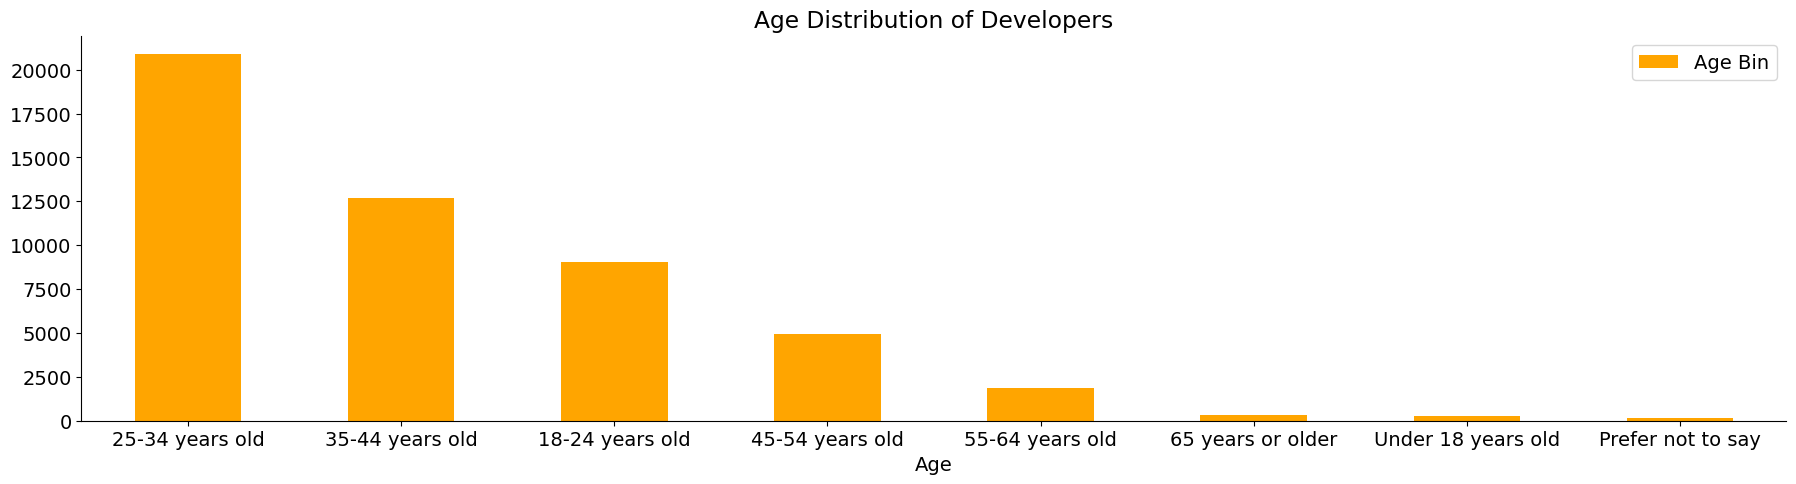

In [7]:
results.query('MainBranch=="I am a developer by profession"')['Age'].value_counts().plot(kind='bar', label='Age Bin', color='orange')
plt.title('Age Distribution of Developers')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [8]:
developer_os_pct = round(results.query('MainBranch=="I am a developer by profession"')['CodingActivities']\
                .str.contains('Contribute to open-source projects').sum()\
                /len(results.query('MainBranch=="I am a developer by profession"'))*100,2)
print(f"{developer_os_pct}% of the professional developers contribute to open source as their hobby.")

23.47% of the professional developers contribute to open source as their hobby.


Top 5 Coding Activities of Professional Developers

In [9]:
results.query('MainBranch=="I am a developer by profession"')['CodingActivities'].value_counts().head(5)

CodingActivities
Hobby                                                                        8721
I don’t code outside of work                                                 5877
Hobby;Professional development or self-paced learning from online courses    5499
Hobby;Contribute to open-source projects                                     3291
Professional development or self-paced learning from online courses          2689
Name: count, dtype: int64

In [10]:
beginner_os_pct = round(results.query('MainBranch!="I am a developer by profession"')['CodingActivities']\
                .str.contains('Contribute to open-source projects').sum()\
                /len(results.query('MainBranch!="I am a developer by profession"'))*100,2)
print(f"{beginner_os_pct}% of the non-professional developers contribute to open source as their hobby.")

12.69% of the non-professional developers contribute to open source as their hobby.


Top 5 Coding Activities of Non Professional Developers

In [11]:
results.query('MainBranch!="I am a developer by profession"')['CodingActivities'].value_counts().head(5)

CodingActivities
Hobby                                                                        1272
Hobby;Professional development or self-paced learning from online courses     704
I don’t code outside of work                                                  631
Hobby;Contribute to open-source projects                                      441
Hobby;School or academic work                                                 432
Name: count, dtype: int64

**Show the remote work distribution of the respondents** 

In [12]:
round(results['RemoteWork'].value_counts()/len(results)*100,2).to_frame()\
                .reset_index().rename(columns={'count':'Percentage'})

,RemoteWork,Percentage
0,"Hybrid (some remote, some in-person)",35.17
1,Remote,31.83
2,In-person,16.75


**What are the type of developers that are there in our survey?**

In [13]:
developers = results.query('MainBranch == "I am a developer by profession"')
length =  developers.shape[0]

round(results.query('MainBranch == "I am a developer by profession"')['DevType'].value_counts()/length*100,2)\
                    .to_frame().reset_index().rename(columns={'count':'Percentage'})

,DevType,Percentage
0,"Developer, full-stack",34.32
1,"Developer, back-end",18.96
2,"Developer, front-end",6.07
3,"Developer, desktop or enterprise applications",4.54
4,"Developer, mobile",3.72
5,"Developer, embedded applications or devices",3.04
6,Other (please specify):,2.15
7,Data engineer,1.95
8,Engineering manager,1.88
9,Student,1.63


In [14]:
#Creating a new column for currency symbol
developers['Currency_Symbols'] = developers['Currency'].str.split("\t").str.get(0).str.split(" ").str.get(0)

# Where USD is the base currency you want to use
url = 'https://v6.exchangerate-api.com/v6/d93b586cfb678435f9e8eab2/latest/USD'

# Making our request
response = requests.get(url)
data = response.json()

rates = [
    [data['conversion_rates'][i] if i is not None and i in data['conversion_rates'].keys() else \
            None for i in developers['Currency_Symbols']]
]

#converting the python list `rates` into a numpy array and flattening it to make it 1D
developers['Exch_Rate'] =  np.array(rates).ravel()

#Converting the Compensation into a Common Currency which is USD in our case
developers['Comp_USD'] = np.around(developers[developers['Exch_Rate']>0]['CompTotal']/developers[developers['Exch_Rate']>0]['Exch_Rate'],2)

**What is the org size distribution of the developers?**

In [15]:
round(developers['OrgSize'].value_counts()/len(developers)*100,2).to_frame().reset_index().rename(columns={'count':'Percentage'})

,OrgSize,Percentage
0,20 to 99 employees,18.15
1,100 to 499 employees,15.90
2,"10,000 or more employees",9.77
3,"1,000 to 4,999 employees",9.44
4,2 to 9 employees,8.91
5,10 to 19 employees,7.61
6,500 to 999 employees,5.73
7,"Just me - I am a freelancer, sole proprietor, ...",5.32
8,"5,000 to 9,999 employees",3.24
9,I don’t know,1.77


**Visualize the compensation the developers**

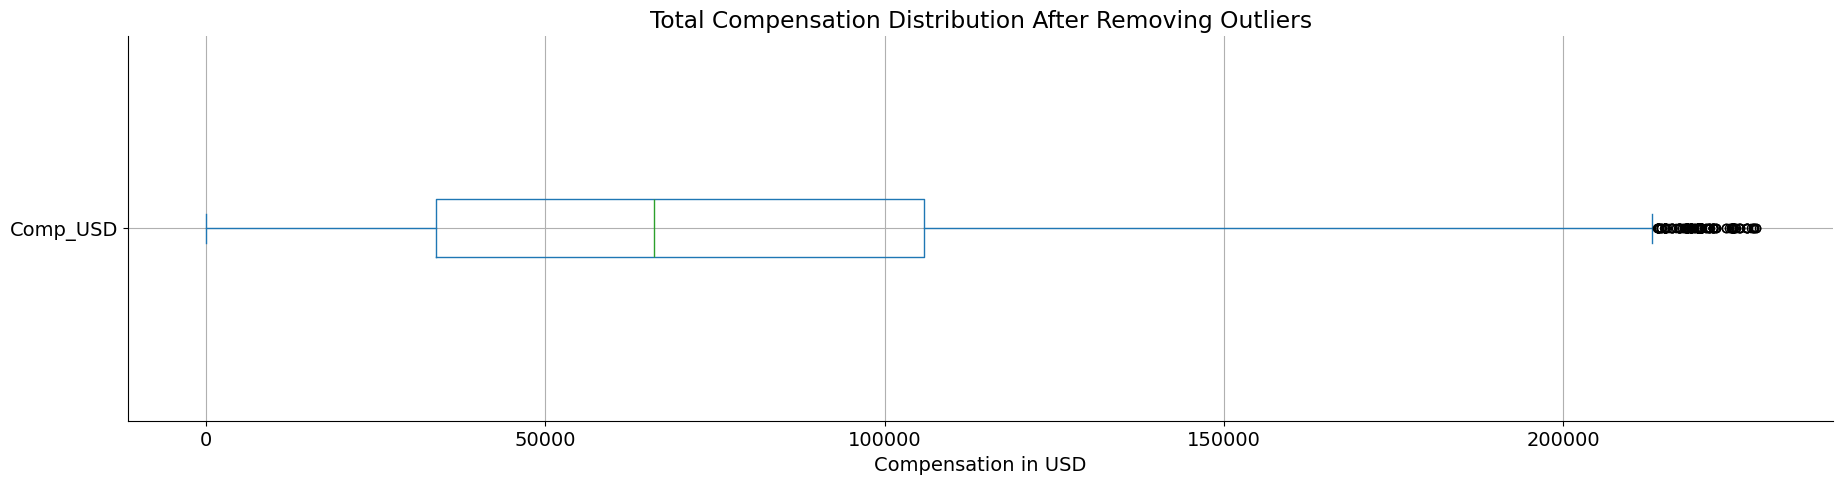

In [16]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = developers['Comp_USD'].quantile(0.25)
Q3 = developers['Comp_USD'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to remove outliers
filtered_data = developers[(developers['Comp_USD'] >= lower_bound) & 
                           (developers['Comp_USD'] <= upper_bound)]

# Step 5: Plot the cleaned data
filtered_data['Comp_USD'].plot(kind='box', vert=False, grid=True, 
                               title='Total Compensation Distribution After Removing Outliers')
plt.xlabel('Compensation in USD')
plt.show()

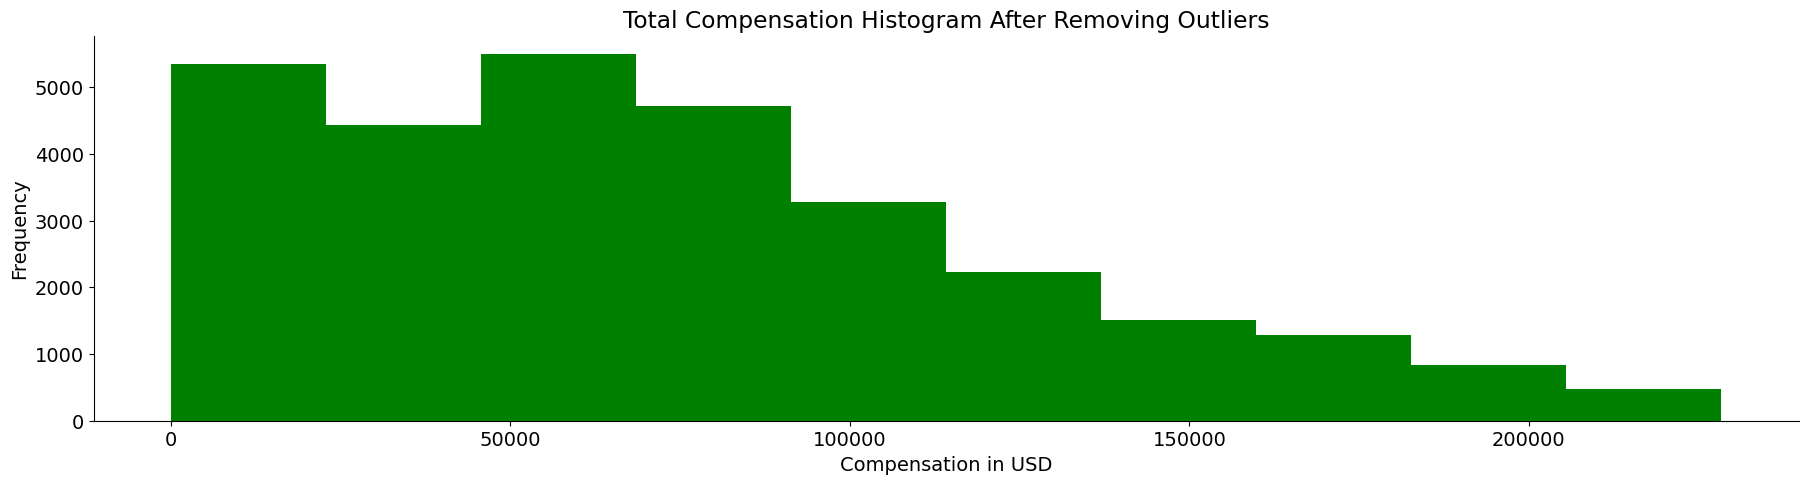

In [17]:
filtered_data['Comp_USD'].plot(kind='hist', title='Total Compensation Histogram After Removing Outliers', color='green')
plt.xlabel('Compensation in USD')
plt.show()

Most developers are within the 70,000 USD range. Let's take a look at the experience range of folks with salary comp of greater than 70,000 USD.

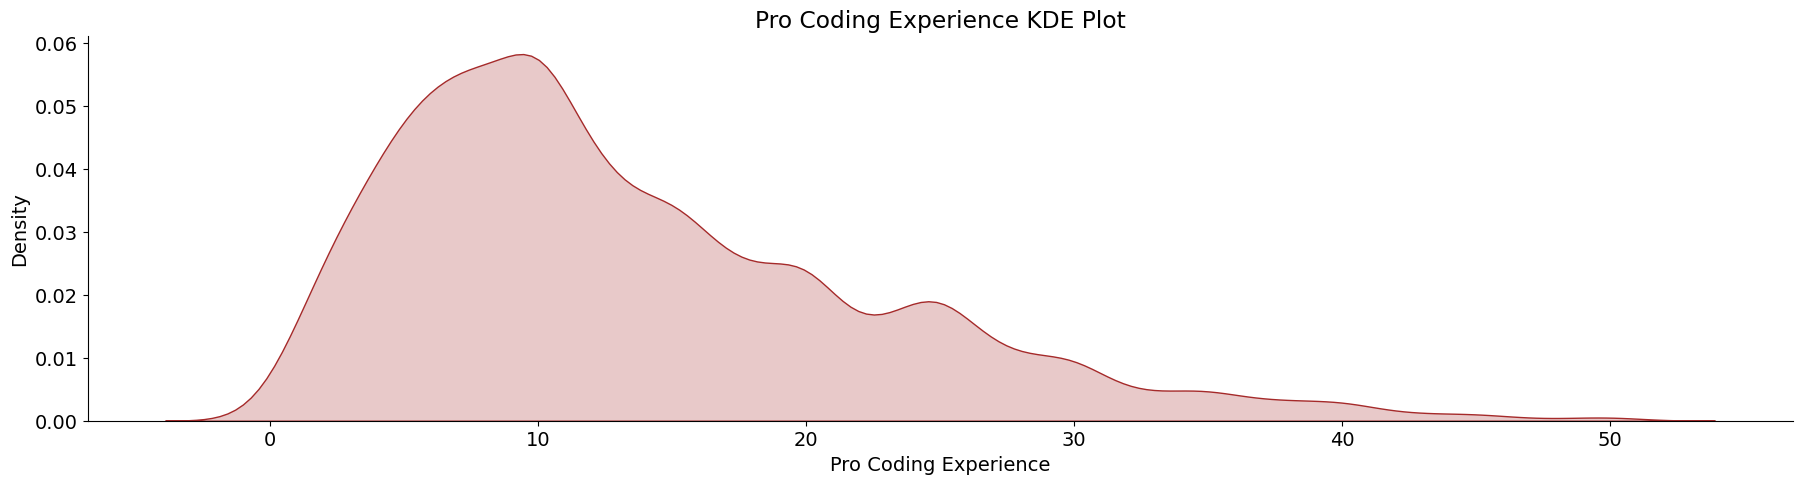

In [18]:
mapping_dict = {
    'More than 50 years': '50',
    'Less than 1 year': '1',
    None: '0'
}

series = pd.to_numeric(developers[developers['Comp_USD'] > 70000]['YearsCodePro'].map(mapping_dict).fillna(developers['YearsCodePro']))
# Plotting the KDE plot
sns.kdeplot(series, color='brown', fill='brown')
plt.title('Pro Coding Experience KDE Plot')
plt.xlabel('Pro Coding Experience')
plt.ylabel('Density')
plt.show()

Most of the developers that have more than 70,000 USD Compensation have more than 10 years of experience which is only 5% of the lot

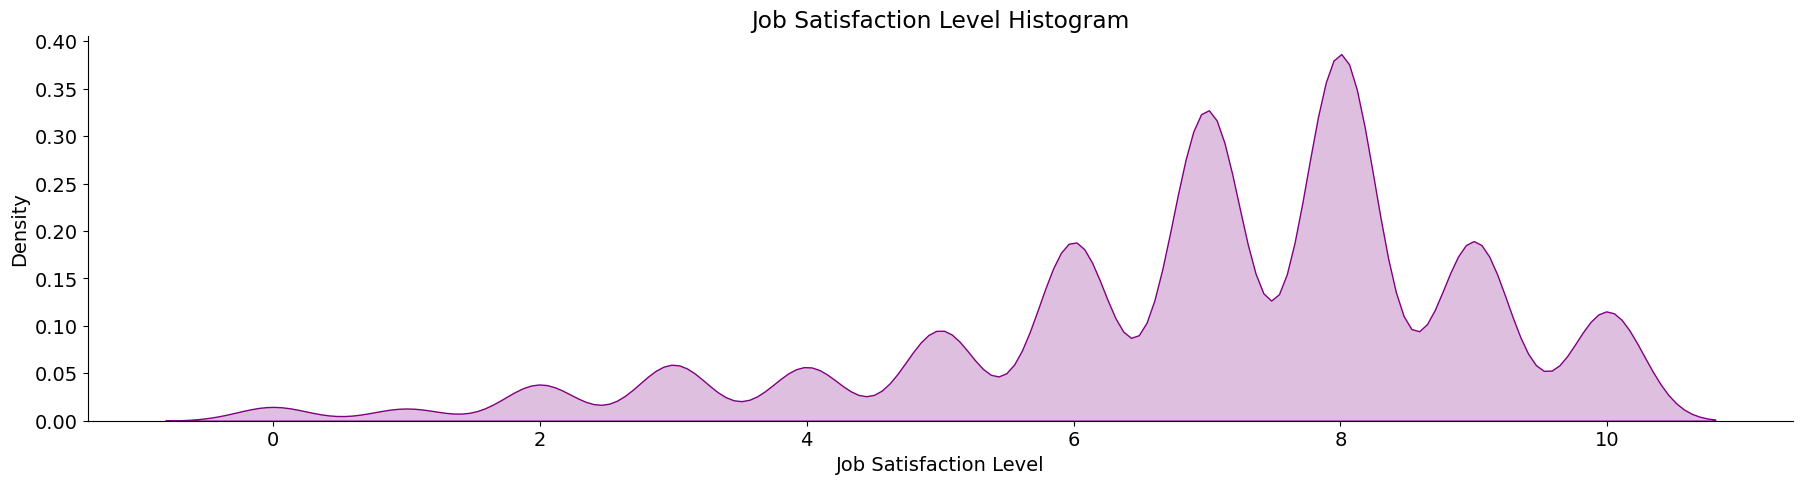

In [19]:
temp = developers[list(developers.columns[1:8]) + \
                    list(developers.columns[ developers.columns.str.contains('JobSat')])]\
                        .query("JobSat>=0")


sns.kdeplot(temp['JobSat'], color='purple', fill='purple')
plt.xlabel('Job Satisfaction Level')
plt.title('Job Satisfaction Level Histogram')
plt.ylabel('Density')
plt.show()

Top 10 Languages Worked With

In [20]:
languages = developers['LanguageHaveWorkedWith'].str.split(";", expand=True)
languages_filled = np.where(languages.notna(), languages,None)
round(pd.Series([i for i in languages_filled.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'language', 'count':'Percent'}).head(10)

,language,Percent
0,JavaScript,59.70
1,SQL,49.96
2,HTML/CSS,49.07
3,Python,43.82
4,TypeScript,40.09
5,Bash/Shell (all shells),31.71
6,Java,28.17
7,C#,26.55
8,C++,19.20
9,PHP,17.25


Top 10 Languages Want to Work With

In [21]:
languages = developers['LanguageWantToWorkWith'].str.split(";", expand=True)
languages_seeking = np.where(languages.notna(), languages,None)
round(pd.Series([i for i in languages_seeking.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'language', 'count':'Percent'}).head(10)

,language,Percent
0,JavaScript,37.14
1,SQL,35.92
2,Python,35.83
3,TypeScript,33.91
4,HTML/CSS,31.95
5,Rust,26.43
6,Go,22.43
7,C#,20.73
8,Bash/Shell (all shells),20.63
9,Java,16.28


Bottom 20 Languages Developers want to work with

In [22]:
round(pd.Series([i for i in languages_seeking.ravel() if i != None]).value_counts()/len(developers)*100,2)\
        .to_frame()\
        .reset_index()\
        .rename_axis(columns=None)\
        .rename(columns={'index':'language', 'count':'Percent'})\
        .tail(20).reset_index(drop=True)

,language,Percent
0,Lisp,1.68
1,OCaml,1.51
2,Solidity,1.41
3,Groovy,1.35
4,Julia,1.33
5,MicroPython,1.19
6,Visual Basic (.Net),1.18
7,Objective-C,0.95
8,Perl,0.94
9,MATLAB,0.93


Top 10 Databases Developers have worked with

In [23]:
databases = developers['DatabaseHaveWorkedWith'].str.split(";", expand=True)
databases_filled = np.where(databases.notna(), databases,None)
round(pd.Series([i for i in databases_filled.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'Database', 'count':'Percent'}).head(10)

,Database,Percent
0,PostgreSQL,43.12
1,MySQL,32.83
2,SQLite,26.89
3,Microsoft SQL Server,22.34
4,MongoDB,21.04
5,Redis,18.79
6,MariaDB,14.22
7,Elasticsearch,11.72
8,Oracle,8.49
9,Dynamodb,7.51


Top 10 Databases developers want to work with

In [24]:
databases = developers['DatabaseAdmired'].str.split(";", expand=True)
databases_sought = np.where(databases.notna(), databases,None)
round(pd.Series([i for i in databases_sought.ravel() if i != None]).value_counts()/len(developers)*100,2).to_frame()\
        .reset_index().rename_axis(columns=None).rename(columns={'index':'Database', 'count':'Percent'}).head(10)

,Database,Percent
0,PostgreSQL,32.57
1,MySQL,17.18
2,SQLite,16.90
3,Redis,12.71
4,Microsoft SQL Server,12.43
5,MongoDB,11.74
6,MariaDB,7.94
7,Elasticsearch,5.87
8,Dynamodb,3.75
9,Oracle,3.18


48% Developers Think AI Is not a threat

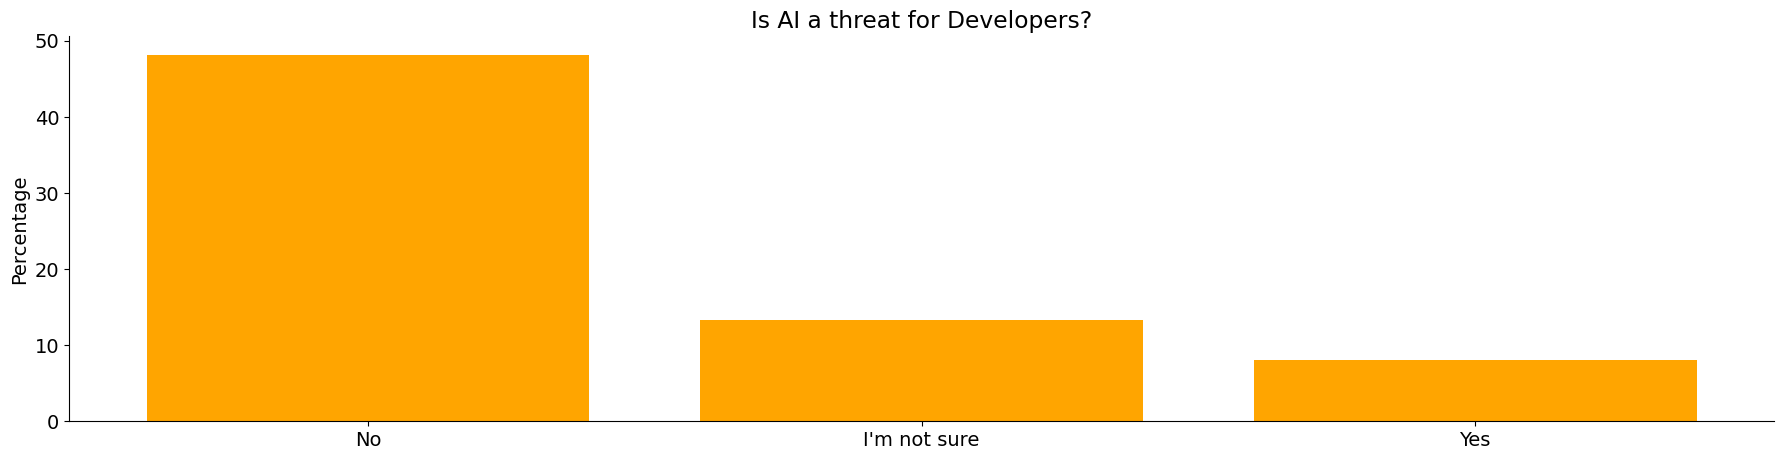

In [25]:
AIThreat = pd.DataFrame(developers['AIThreat'].value_counts()/len(developers)*100).reset_index().rename(columns={'count': 'Percentage'})
plt.bar(x=AIThreat['AIThreat'], height=AIThreat['Percentage'], color='orange')
plt.title('Is AI a threat for Developers?')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()